<a href="https://colab.research.google.com/github/swastika1122/CHURN-PREDICTION-MODEL/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##HANDLING MISSING VALUES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [ ]:
df=pd.read_csv('CUSTOMER_DATA.csv')

In [ ]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6418 entries, 0 to 6417
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6418 non-null   object 
 1   Gender                       6418 non-null   object 
 2   Age                          6418 non-null   int64  
 3   Married                      6418 non-null   object 
 4   State                        6418 non-null   object 
 5   Number_of_Referrals          6418 non-null   int64  
 6   Tenure_in_Months             6418 non-null   int64  
 7   Value_Deal                   2870 non-null   object 
 8   Phone_Service                6418 non-null   object 
 9   Multiple_Lines               5796 non-null   object 
 10  Internet_Service             6418 non-null   object 
 11  Internet_Type                5028 non-null   object 
 12  Online_Security              5028 non-null   object 
 13  Online_Backup     

In [ ]:
df.describe(include='all')


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
count,6418,6418,6418.000000,6418,6418,6418.000000,6418.000000,2870,6418,5796,...,6418,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418.000000,6418,1732,1732
unique,6418,2,NaN,2,22,NaN,NaN,5,2,2,...,3,NaN,NaN,NaN,NaN,NaN,NaN,3,5,20
top,34476-TAM,Female,NaN,No,Uttar Pradesh,NaN,NaN,Deal 2,Yes,No,...,Bank Withdrawal,NaN,NaN,NaN,NaN,NaN,NaN,Stayed,Competitor,Competitor had better devices
freq,1,4048,NaN,3223,629,NaN,NaN,758,5796,3082,...,3575,NaN,NaN,NaN,NaN,NaN,NaN,4275,761,289
mean,NaN,NaN,47.070739,NaN,NaN,7.427859,17.342786,NaN,NaN,NaN,...,NaN,63.652867,2280.374858,1.924944,6.718604,748.703468,3033.871987,NaN,NaN,NaN
std,NaN,NaN,16.703633,NaN,NaN,4.621519,10.576391,NaN,NaN,NaN,...,NaN,31.188823,2268.049985,7.849083,24.722533,847.672844,2866.505426,NaN,NaN,NaN
min,NaN,NaN,18.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,...,NaN,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000,NaN,NaN,NaN
25%,NaN,NaN,33.000000,NaN,NaN,3.000000,8.000000,NaN,NaN,NaN,...,NaN,30.562500,395.725000,0.000000,0.000000,70.805000,603.742500,NaN,NaN,NaN
50%,NaN,NaN,46.000000,NaN,NaN,7.000000,16.000000,NaN,NaN,NaN,...,NaN,70.100000,1396.125000,0.000000,0.000000,407.475000,2108.635000,NaN,NaN,NaN
75%,NaN,NaN,60.000000,NaN,NaN,11.000000,27.000000,NaN,NaN,NaN,...,NaN,89.750000,3783.600000,0.000000,0.000000,1182.917500,4801.537500,NaN,NaN,NaN


In [ ]:
#Standardize Column Name
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['customer_id', 'gender', 'age', 'married', 'state',
       'number_of_referrals', 'tenure_in_months', 'value_deal',
       'phone_service', 'multiple_lines', 'internet_service', 'internet_type',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_category', 'churn_reason'],
      dtype='object')

In [ ]:
df.head()

,customer_id,gender,age,married,state,number_of_referrals,tenure_in_months,value_deal,phone_service,multiple_lines,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df = df.replace({np.nan: None})
df.isna().sum()

,0
customer_id,0
gender,0
age,0
married,0
state,0
number_of_referrals,0
tenure_in_months,0
value_deal,3548
phone_service,0
multiple_lines,622


#EXPLORATORY DATA ANALYSIS

In [ ]:
#Basic Setup (EDA Libraries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

##Target Variable Distribution

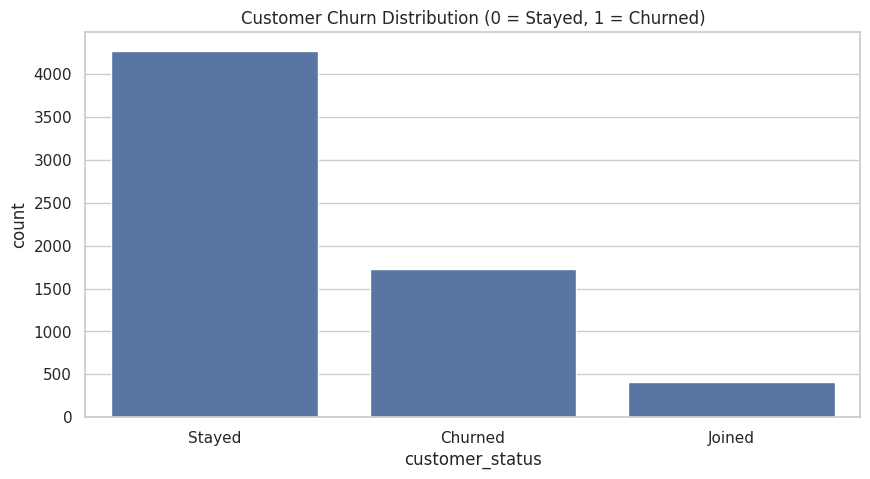

In [ ]:
#Churn vs Stayed
sns.countplot(x='customer_status', data=df)
plt.title("Customer Churn Distribution (0 = Stayed, 1 = Churned)")
plt.show()

In [ ]:
#churn Percentage
churn_rate = df['customer_status'].value_counts(normalize=True) * 100
print(churn_rate)

customer_status
Stayed     66.609536
Churned    26.986600
Joined      6.403864
Name: proportion, dtype: float64


##Categorical Features vs Churn

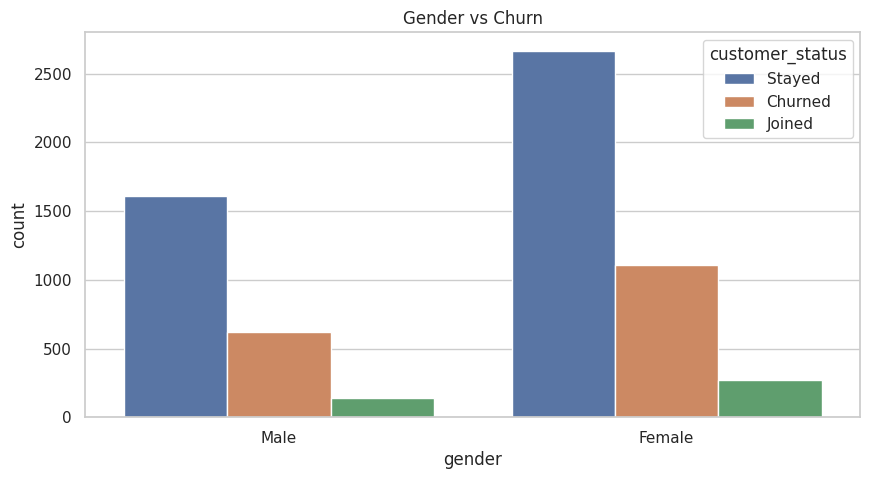

In [ ]:
#Gender vs Churn
sns.countplot(x='gender', hue='customer_status', data=df)
plt.title("Gender vs Churn")
plt.show()

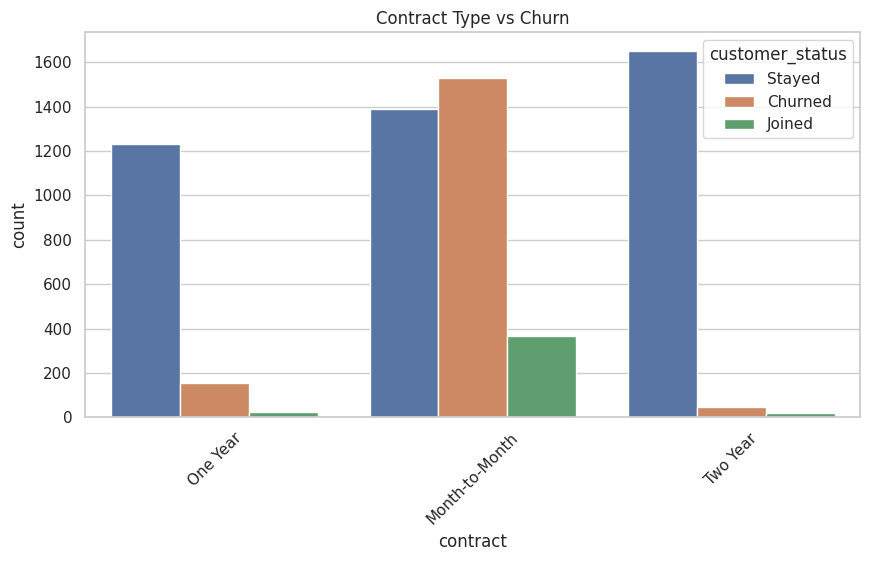

In [ ]:
#Contract Type vs Churn
sns.countplot(x='contract', hue='customer_status', data=df)
plt.xticks(rotation=45)
plt.title("Contract Type vs Churn")
plt.show()

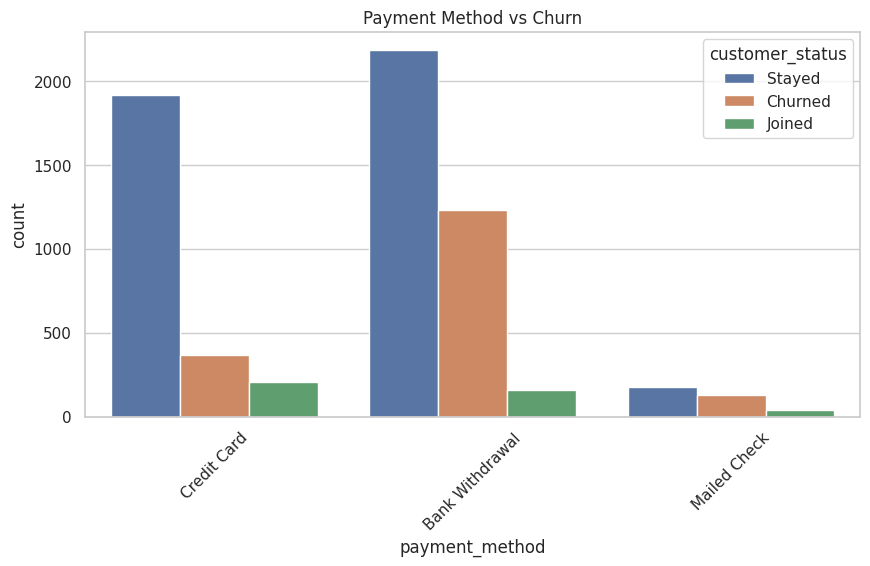

In [ ]:
#Payment Method vs Churn
sns.countplot(x='payment_method', hue='customer_status', data=df)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()

##Numerical Features vs Churn

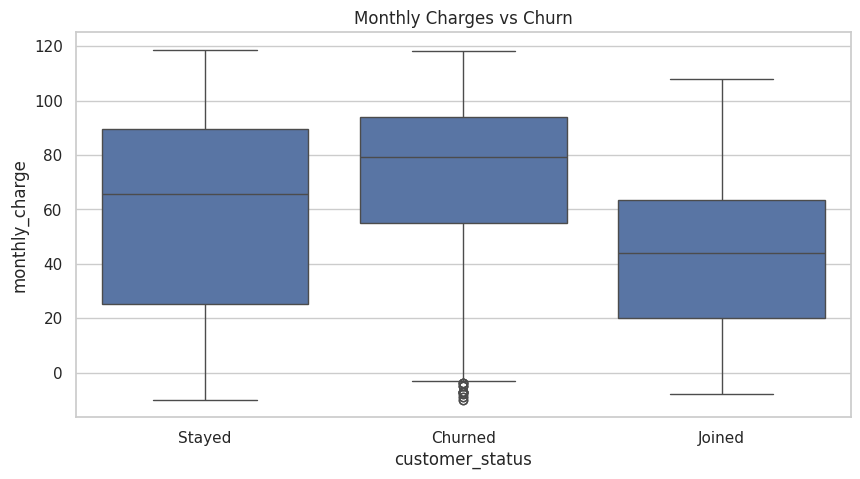

In [ ]:
#Monthly Charges vs Churn
sns.boxplot(x='customer_status', y='monthly_charge', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

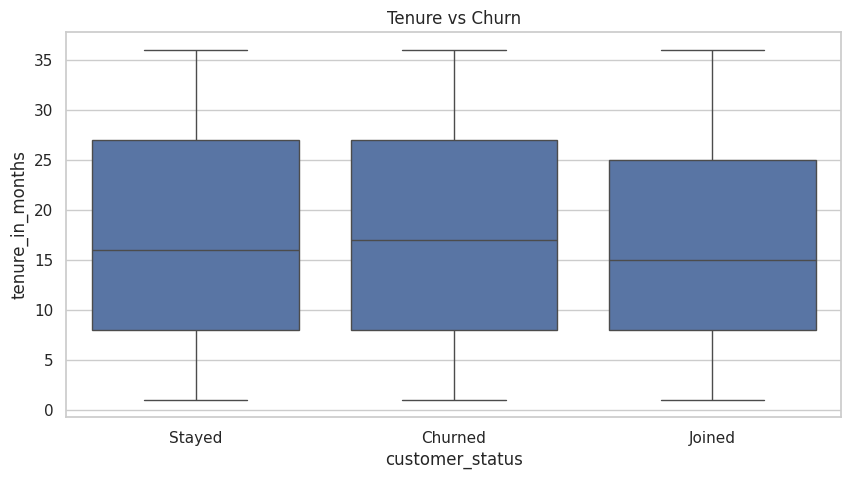

In [ ]:
#Tenure vs Churn
sns.boxplot(x='customer_status', y='tenure_in_months', data=df)
plt.title("Tenure vs Churn")
plt.show()

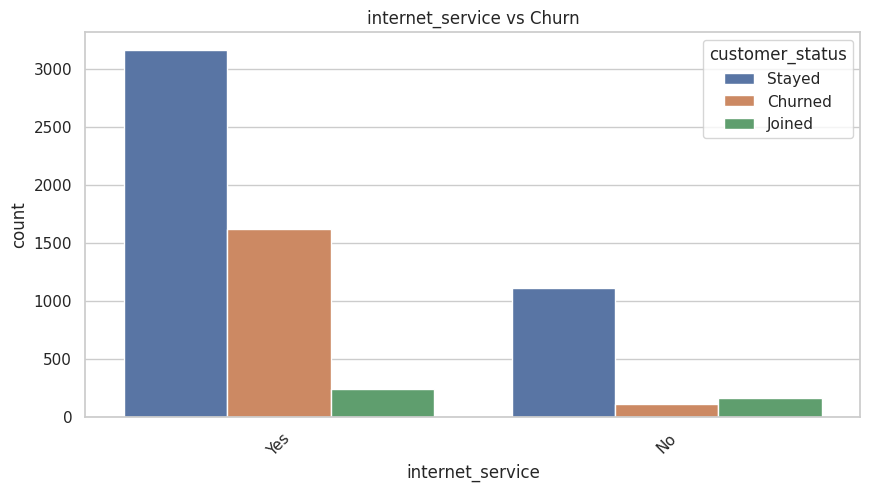

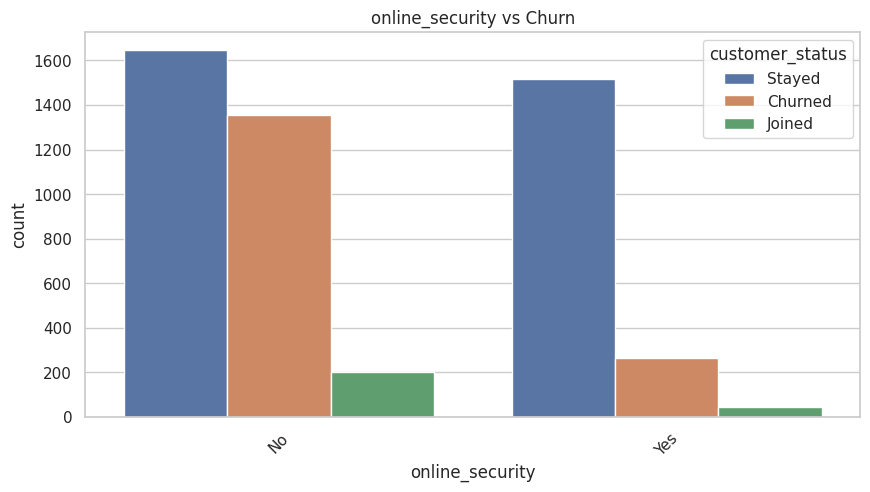

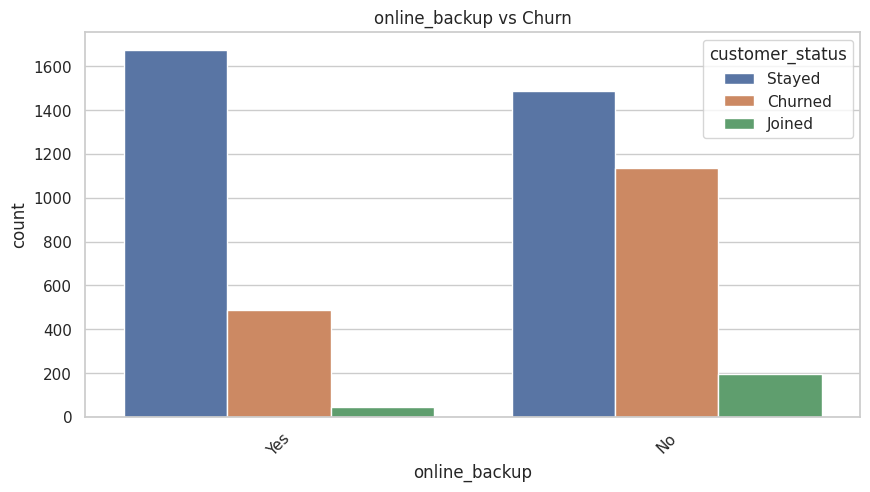

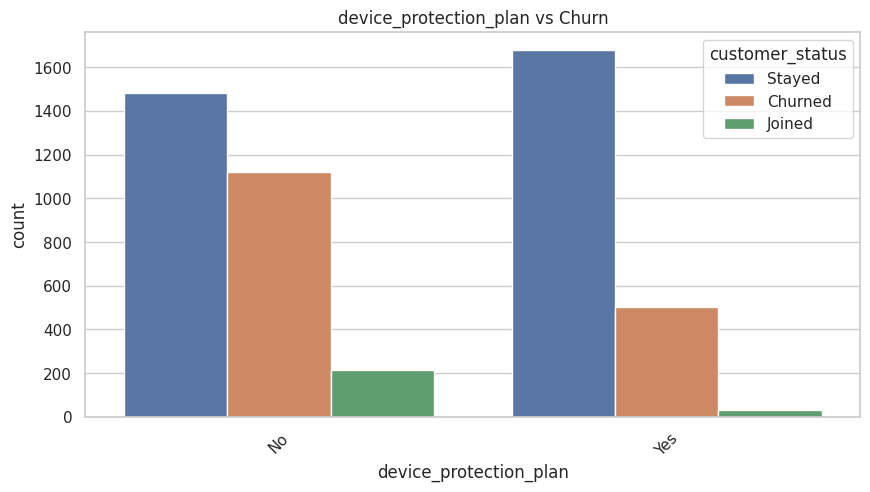

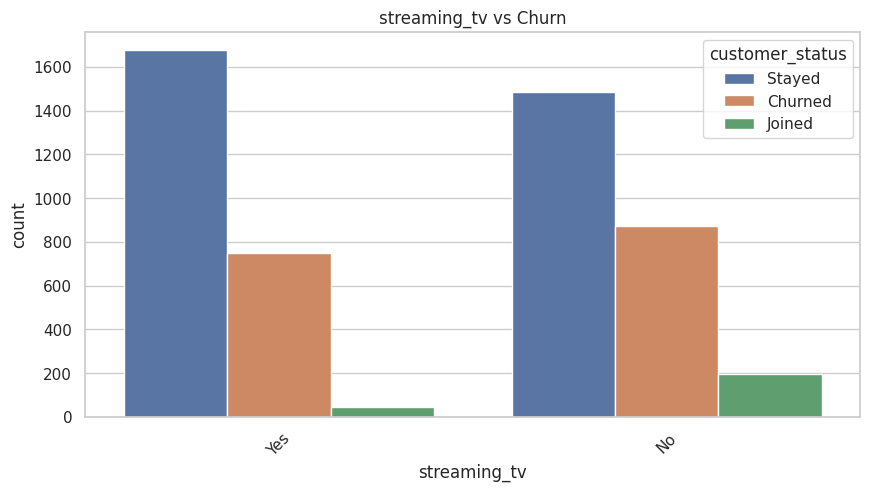

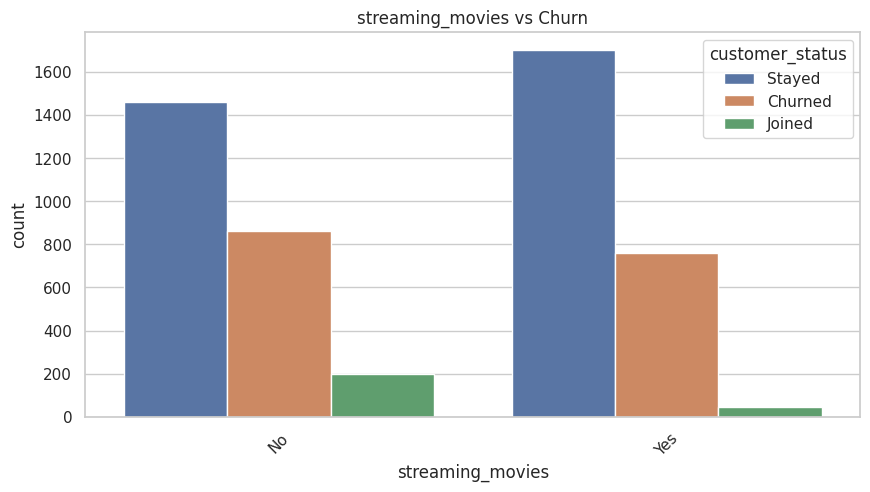

In [ ]:
#Internet Services Impact
internet_cols = [
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection_plan',
    'streaming_tv',
    'streaming_movies'
]

for col in internet_cols:
    sns.countplot(x=col, hue='customer_status', data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Churn")
    plt.show()

##FINDING CORRELATION

First, we can select all numerical columns from the DataFrame using `df.select_dtypes(include=np.number)`.

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
display(numeric_df.head())

,age,number_of_referrals,tenure_in_months,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
0,35,7,27,65.6,593.30,0.00,0,381.51,974.81
1,45,14,13,-4.0,542.40,38.33,10,96.21,610.28
2,51,4,35,73.9,280.85,0.00,0,134.60,415.45
3,79,3,21,98.0,1237.85,0.00,0,361.66,1599.51
4,80,3,8,83.9,267.40,0.00,0,22.14,289.54


Now that we have a DataFrame containing only numeric columns, we can calculate the correlation matrix.

In [ ]:
corr_matrix_numeric = numeric_df.corr()
display(corr_matrix_numeric.head())

,age,number_of_referrals,tenure_in_months,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
age,1.000000,-0.009325,0.150851,0.134226,0.058049,0.017724,0.029559,0.005049,0.047629
number_of_referrals,-0.009325,1.000000,-0.010544,-0.006456,-0.000224,0.014115,-0.003736,0.011571,0.003174
tenure_in_months,0.150851,-0.010544,1.000000,-0.005104,-0.000433,0.010795,0.025323,0.004512,0.001181
monthly_charge,0.134226,-0.006456,-0.005104,1.000000,0.623008,0.022994,0.124129,0.232586,0.562727
total_charges,0.058049,-0.000224,-0.000433,0.623008,1.000000,0.036538,0.126160,0.608206,0.972069


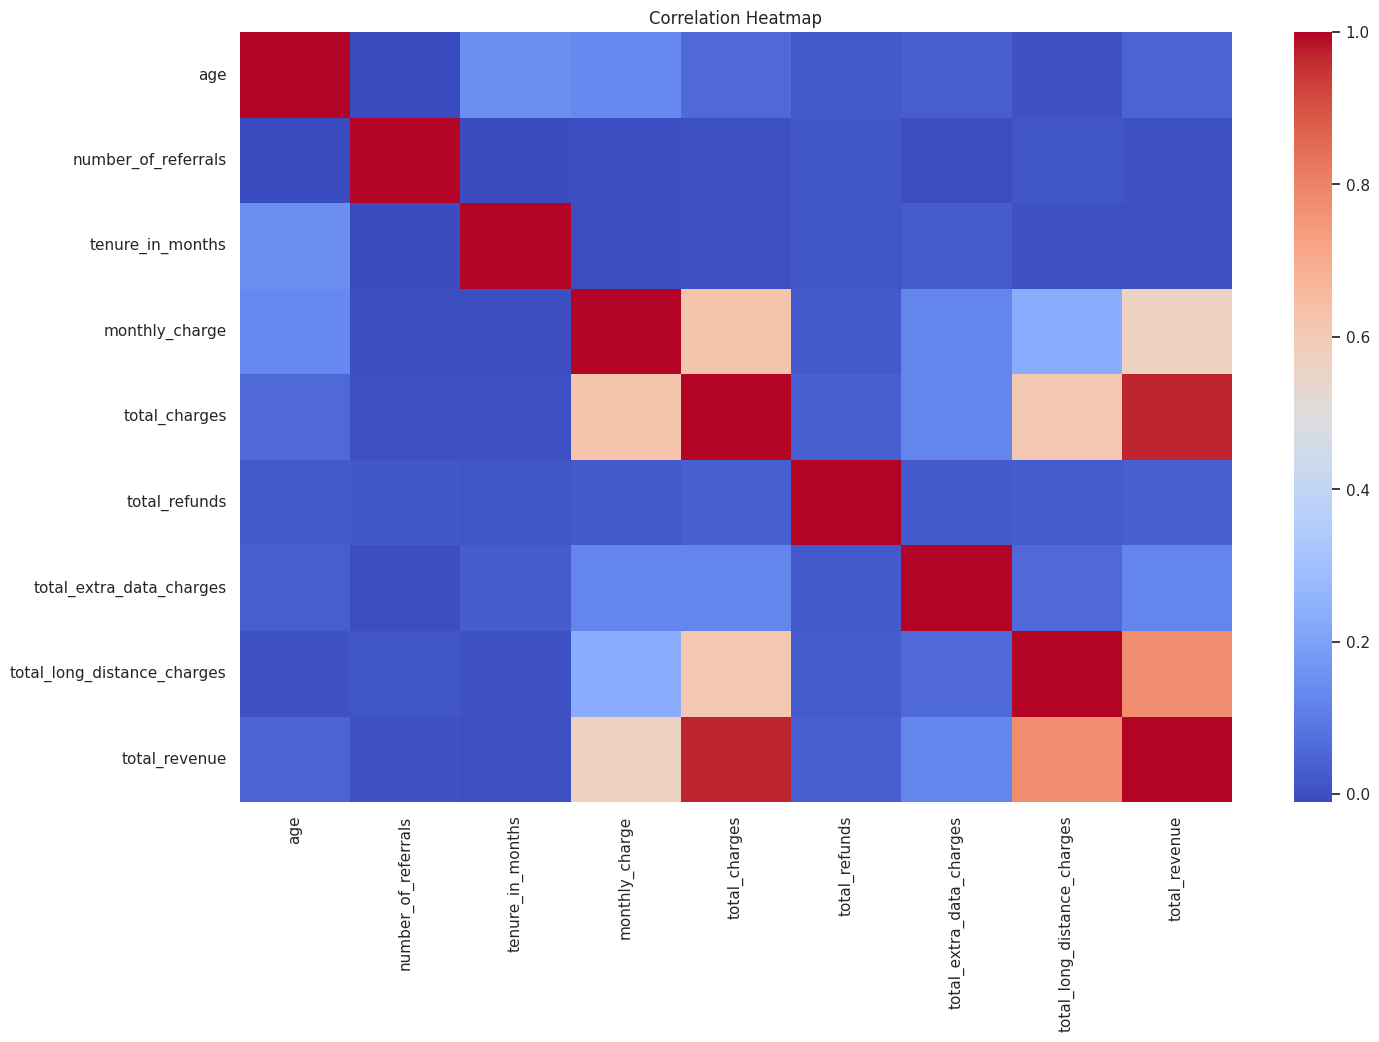

In [ ]:
#HEATMAPS
plt.figure(figsize=(16, 10))
sns.heatmap(
    corr_matrix_numeric,
    cmap='coolwarm',
    annot=False
)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_corr = df.copy()

le = LabelEncoder()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))


In [ ]:
df_corr.corr()['customer_status'].sort_values(ascending=False)


,customer_status
customer_status,1.000000
churn_reason,0.733523
churn_category,0.537784
contract,0.491947
online_security,0.309818
total_revenue,0.300756
premium_support,0.300462
total_long_distance_charges,0.290748
total_charges,0.271655
online_backup,0.216370


In [ ]:
# Filter df_corr for 'Stayed' and 'Churned' customers based on assumed LabelEncoder mapping
# Assuming LabelEncoder typically maps alphabetically: Churned=0, Joined=1, Stayed=2
# So, we filter for customer_status values 0 (Churned) and 2 (Stayed)
filtered_data = df_corr[df_corr['customer_status'].isin([0, 2])].copy()

# Remap 'customer_status' to binary (Stayed=0, Churned=1)
# If original encoding was Churned=0, Stayed=2:
# Map 2 (Stayed) to 0
# Map 0 (Churned) to 1
filtered_data['customer_status'] = filtered_data['customer_status'].map({2: 0, 0: 1})

# Define the target variable y
y = filtered_data['customer_status']

# Define the feature matrix X
# Drop 'customer_id', 'churn_category', 'churn_reason', and the (now remapped) 'customer_status' from features
X = filtered_data.drop(columns=['customer_id', 'churn_category', 'churn_reason', 'customer_status'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (6007, 28)
Shape of y: (6007,)


#MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)


In [ ]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[789  52]
 [135 226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       841
           1       0.81      0.63      0.71       361

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [ ]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


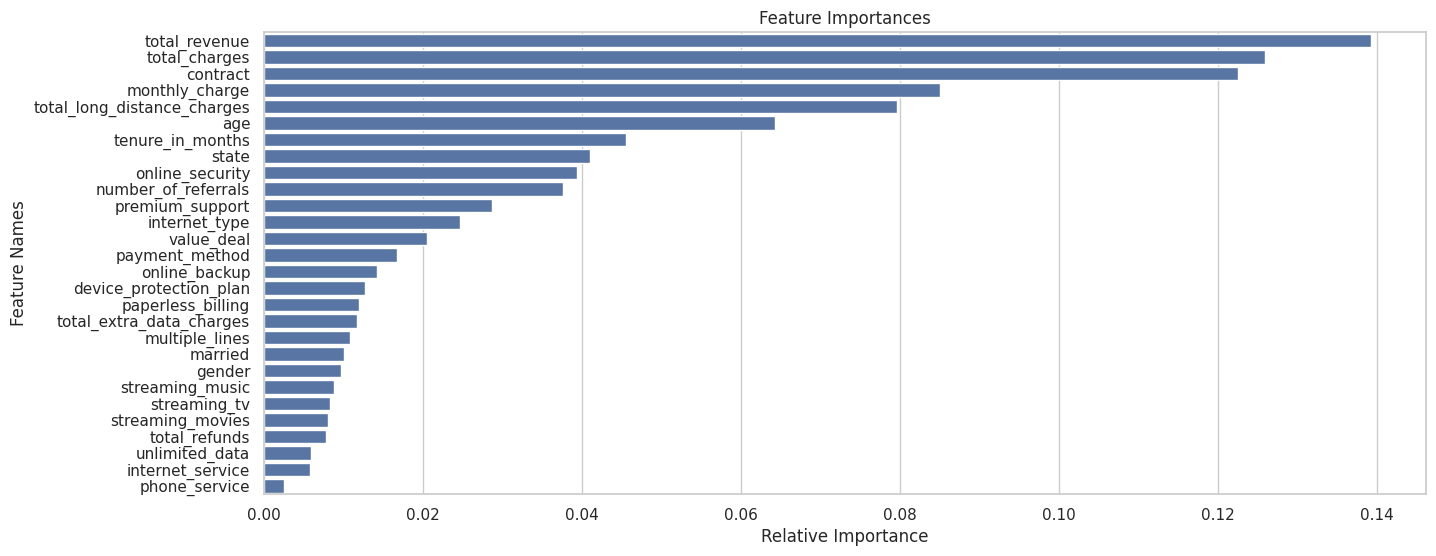

In [ ]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


#TESTING

In [ ]:
new_data = df.copy()


In [ ]:
# Load the raw dataset again to preserve original IDs for output
# This 'df' will be used to map back the predictions to original customer_ids.
df = pd.read_csv("CUSTOMER_DATA.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Keep original safe before any filtering/remapping for merging results later
original_data_for_output = df.copy()

# --- Prepare data for prediction, consistent with model training ---
# The model was trained on 'filtered_data' derived from 'df_corr'.
# 'filtered_data' had 'customer_status' values 0 (Churned) and 2 (Stayed) from df_corr,
# which were then remapped to 0 (Stayed) and 1 (Churned) for the target 'y'.
# Features 'X' were created by dropping 'customer_id', 'churn_category', 'churn_reason', and 'customer_status' from 'filtered_data'.

# Create a temporary DataFrame for prediction, starting from df_corr.
# df_corr has already been label-encoded for all object columns.
temp_df_for_pred = df_corr.copy()

# Filter temp_df_for_pred to include only customers whose 'customer_status' corresponds to
# 'Churned' (0) or 'Stayed' (2) in the LabelEncoded df_corr, to match training data scope.
temp_df_for_pred = temp_df_for_pred[temp_df_for_pred['customer_status'].isin([0, 2])].copy()

# Define the feature matrix X_predict by dropping the same columns as were dropped from X_train.
X_predict = temp_df_for_pred.drop(columns=[
    'customer_id', # encoded customer_id will be dropped as it's not a feature
    'churn_category',
    'churn_reason',
    'customer_status' # The original encoded customer_status (0, 1, 2) from df_corr
])

# Ensure the column names of X_predict precisely match the feature names the model was trained on.
X_predict.columns = rf_model.feature_names_in_

# Make predictions using the trained Random Forest model
predictions = rf_model.predict(X_predict)

# --- Attach predictions back to the original data for output ---
# The predictions correspond to the rows in temp_df_for_pred.
# We need to link these predictions back to the original string 'customer_id'.

# Get the original customer_ids (strings) corresponding to the rows that were predicted
original_customer_ids_for_predicted_rows = original_data_for_output.loc[temp_df_for_pred.index, 'customer_id'].values

# Create a DataFrame to hold the original customer_id strings and their predictions
predictions_df = pd.DataFrame({
    'customer_id': original_customer_ids_for_predicted_rows,
    'predicted_churn': predictions
})

# Merge predictions back to the full original_data_for_output
# We use a left merge to keep all original customers and add predictions where available
original_data_with_predictions = original_data_for_output.merge(
    predictions_df,
    on='customer_id',
    how='left'
)

# Filter for churned customers (where predicted_churn is 1)
# Note: Predicted_churn could be NaN for customers not in the filtered_data (e.g., 'Joined' status)
churned = original_data_with_predictions[original_data_with_predictions['predicted_churn'] == 1]

# Save the churned customers to a CSV file
churned.to_csv("/content/Predictions.csv", index=False)

# Task
Prepare the feature matrix (X) and target vector (y) from the `df_corr` DataFrame, dropping 'customer_id', 'churn_category', 'churn_reason', and 'customer_status' from X. Then, train a `RandomForestClassifier` model, extract the feature importances, visualize the top 10 most important features using a bar plot, and summarize the findings.

## Extract and Visualize Feature Importances

### Subtask:
Extract the feature importances from the trained Random Forest Classifier, create a DataFrame to store these importances along with their corresponding feature names, sort them in descending order, and visualize the top 10 most important features using a bar plot.


**Reasoning**:
To extract and visualize the top 10 feature importances as requested by the subtask, I will create a pandas Series from the feature importances, sort it, select the top 10, and then generate a bar plot.



/tmp/ipython-input-2760505994.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')


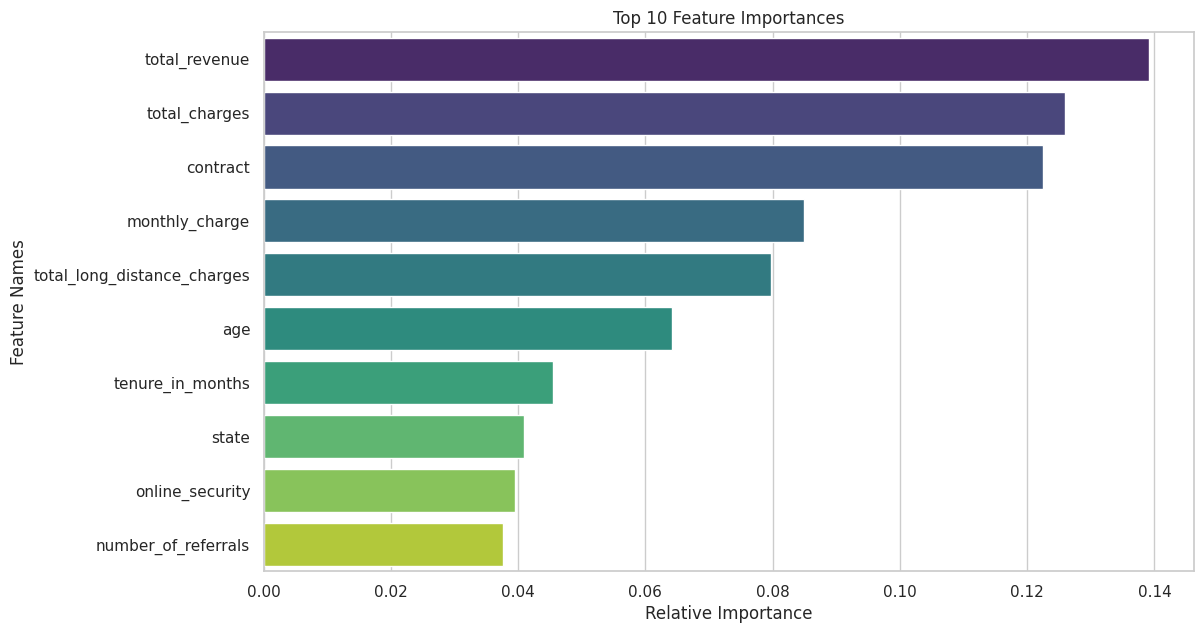

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` because the `palette` argument was used without specifying a `hue` argument in `sns.barplot`. To resolve this and align with the suggested fix in the warning, I will explicitly set the `y` variable as `hue` and disable the legend to maintain the intended visualization.



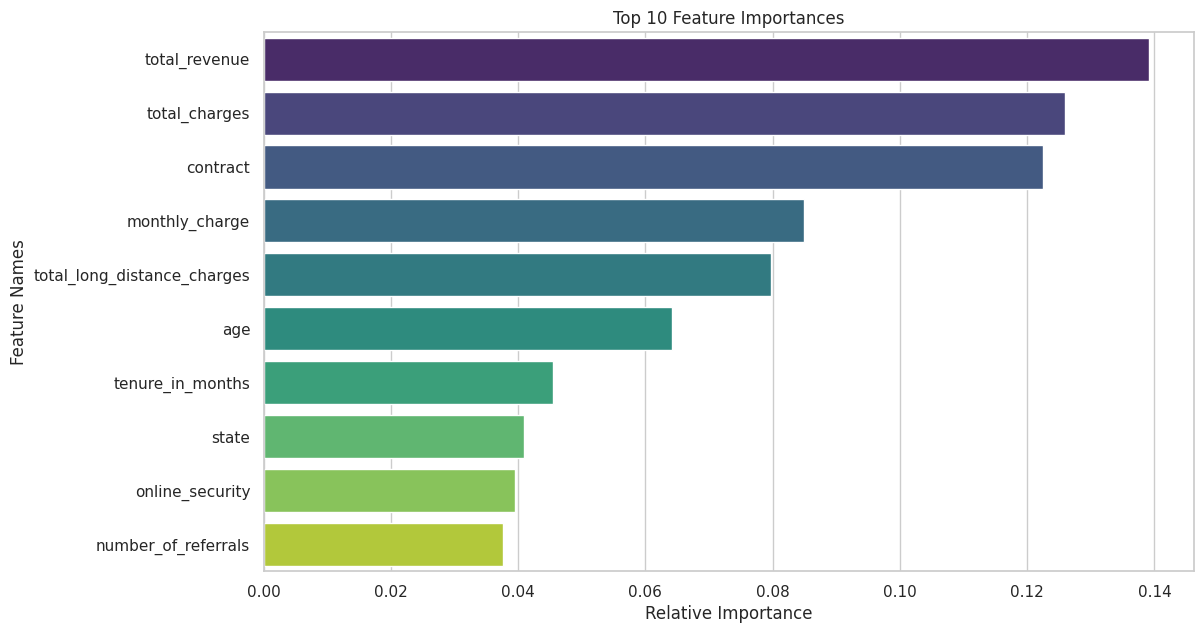

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_10_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_features.values, y=top_10_features.index, hue=top_10_features.index, legend=False, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

## Final Task

### Subtask:
Summarize the findings from the feature importance analysis.


## Summary:

### Data Analysis Key Findings

*   A Random Forest Classifier model was successfully trained to predict customer churn, and its feature importances were extracted.
*   The top 10 most important features influencing churn were identified and visualized using a bar plot, titled 'Top 10 Feature Importances'.
*   A `FutureWarning` was encountered during the initial attempt to generate the bar plot using `seaborn.barplot` due to incorrect handling of `palette` without `hue`, which was successfully resolved by explicitly setting `hue=top_10_features.index` and `legend=False`.

### Insights or Next Steps

*   The identified top 10 features provide a crucial starting point for understanding the primary drivers of customer churn and should be further analyzed to reveal specific business insights.
*   Focus business strategies and interventions on these highly important features to effectively mitigate customer churn, potentially by improving services or addressing pain points related to these factors.


#CHECKING ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy: 0.8444259567387687
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       841
           1       0.81      0.63      0.71       361

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



#AI VERIFICATION

In [ ]:
# ======================================================
# CHURN PREDICTION MODEL – END TO END (FAIL-PROOF)
# ======================================================

# -----------------------------
# 1. IMPORT LIBRARIES
# -----------------------------
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import joblib

# -----------------------------
# 2. LOAD TRAINING DATA
# -----------------------------
df = pd.read_csv(
    "CUSTOMER_DATA.csv"
)

# -----------------------------
# 3. SINGLE PREPROCESSING FUNCTION
# (TRAIN + PREDICTION SAME)
# -----------------------------
def preprocess_churn(df, label_encoders=None, training=True):
    df = df.copy()

    # clean column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # replace garbage / missing values with NaN
    df.replace(
        ['null','NULL','na','NA','n/a','N/A','',' ','?','--'],
        np.nan,
        inplace=True
    )

    # drop non-predictive columns
    drop_cols = ['customer_id', 'churn_category', 'churn_reason']
    df.drop([c for c in drop_cols if c in df.columns], axis=1, inplace=True)

    # encode categorical columns
    cat_cols = df.select_dtypes(include='object').columns

    if training:
        label_encoders = {}
        for col in cat_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
        return df, label_encoders
    else:
        for col in cat_cols:
            df[col] = label_encoders[col].transform(df[col].astype(str))
        return df

# -----------------------------
# 4. PREPROCESS TRAINING DATA
# -----------------------------
X_full, label_encoders = preprocess_churn(df, training=True)

y = X_full['customer_status']              # target
X = X_full.drop('customer_status', axis=1) # features

# -----------------------------
# 5. TRAIN TEST SPLIT
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# -----------------------------
# 6. TRAIN RANDOM FOREST MODEL
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

# -----------------------------
# 7. MODEL EVALUATION
# -----------------------------
y_pred = rf_model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report")
print(classification_report(y_test, y_pred))

# -----------------------------
# 8. FEATURE IMPORTANCE (NO ERROR)
# -----------------------------
feature_importance = pd.DataFrame({
    'Feature': rf_model.feature_names_in_,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))

# -----------------------------
# 9. SAVE MODEL & ARTIFACTS
# -----------------------------
joblib.dump(rf_model, "churn_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(X_train.columns.tolist(), "feature_order.pkl")

# ======================================================
# PREDICTION ON NEW DATA (DEPLOYMENT SAFE)
# ======================================================

# -----------------------------
# 10. LOAD SAVED OBJECTS
# -----------------------------
rf_model = joblib.load("churn_model.pkl")
label_encoders = joblib.load("label_encoders.pkl")
feature_order = joblib.load("feature_order.pkl")

# -----------------------------
# 11. LOAD NEW DATA
# -----------------------------
new_df = pd.read_csv(
    "CUSTOMER_DATA.csv"
)

original_df = new_df.copy()

# -----------------------------
# 12. PREPROCESS NEW DATA
# -----------------------------
X_new = preprocess_churn(
    new_df,
    label_encoders=label_encoders,
    training=False
)

# ensure same feature order
X_new = X_new[feature_order]

# -----------------------------
# 13. SAFETY CHECK (FAIL NA HO)
# -----------------------------
assert list(X_new.columns) == feature_order
assert X_new.isna().sum().sum() == 0

# -----------------------------
# 14. MAKE PREDICTIONS
# -----------------------------
predictions = rf_model.predict(X_new)
original_df['customer_status_predicted'] = predictions

# -----------------------------
# 15. SAVE ONLY CHURNED CUSTOMERS
# -----------------------------
final_output = original_df[
    original_df['customer_status_predicted'] == 1
]

final_output.to_csv(
    "Predictions.csv",
    index=False
)

print("✅ Churn prediction completed successfully")

Confusion Matrix
[[183  16 120]
 [ 35  52   2]
 [ 38   2 836]]

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.57      0.64       319
           1       0.74      0.58      0.65        89
           2       0.87      0.95      0.91       876

    accuracy                           0.83      1284
   macro avg       0.78      0.70      0.73      1284
weighted avg       0.82      0.83      0.83      1284

                        Feature  Importance
27                total_revenue    0.145661
23                total_charges    0.135811
19                     contract    0.103188
26  total_long_distance_charges    0.088114
22               monthly_charge    0.079116
1                           age    0.066346
5              tenure_in_months    0.048547
3                         state    0.044346
4           number_of_referrals    0.041125
11              online_security    0.029719
✅ Churn prediction completed successfully


In [ ]:
import os
os.listdir()


['.config',
 'feature_order.pkl',
 'CUSTOMER_DATA.csv',
 'churn_model.pkl',
 'customer.csv',
 'Predictions.csv',
 'label_encoders.pkl',
 'sample_data']

In [ ]:
from google.colab import files

files.download("churn_model.pkl")
files.download("label_encoders.pkl")
files.download("feature_order.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>